<a href="https://colab.research.google.com/github/ancestor9/2025_Fall_text-image-deep-learning-with-python/blob/main/Unsupervised%20Learning_03_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### (quest) autoencoder를 사용하여 minst 데이터의 1과 8 아라비아 수자 sample을 가지고 label이 없이 아라비아 숫자 1을 학습한 후 1번과 8번 임의의 데이터를 구분하려고 한다. 코드를 부탁해

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1783 - val_loss: 0.0255
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0245 - val_loss: 0.0181
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0179 - val_loss: 0.0149
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - val_loss: 0.0136
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0140 - val_loss: 0.0128
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0134 - val_loss: 0.0119
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0121 - val_loss: 0.0099
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0098 - val_loss: 0.0082
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0083 - val_loss: 0.0074
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 12/20
43/43 ━━

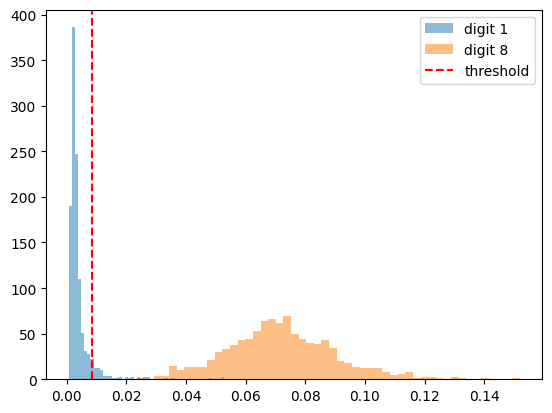

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

# 1. 데이터 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# reshape
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# 2. "1" 데이터만 학습용으로 선택
x_train_1 = x_train[y_train == 1]
x_test_1 = x_test[y_test == 1]
x_test_8 = x_test[y_test == 8]

# 테스트셋 (1과 8 혼합)
x_test_mix = np.concatenate([x_test_1, x_test_8], axis=0)
y_test_mix = np.concatenate([np.zeros(len(x_test_1)), np.ones(len(x_test_8))], axis=0)
# 0 = "1", 1 = "8" 라벨 (평가용)

# 3. Autoencoder 모델 정의
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
encoded = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(28*28, activation='sigmoid')(decoded)
decoded = Reshape((28, 28, 1))(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 4. Autoencoder 학습 (숫자 1만 사용)
autoencoder.fit(x_train_1, x_train_1,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_split=0.2)

# 5. Reconstruction Error 계산
reconstructed = autoencoder.predict(x_test_mix)
errors = np.mean((x_test_mix - reconstructed) ** 2, axis=(1,2,3))

# 6. 분류 결과 평가
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

# threshold를 median으로 설정 (간단)
threshold = np.median(errors)
y_pred = (errors > threshold).astype(int)

print("Accuracy:", accuracy_score(y_test_mix, y_pred))
print("ROC-AUC:", roc_auc_score(y_test_mix, errors))

# 7. 시각화: Reconstruction Error 분포
plt.hist(errors[y_test_mix==0], bins=50, alpha=0.5, label="digit 1")
plt.hist(errors[y_test_mix==1], bins=50, alpha=0.5, label="digit 8")
plt.axvline(threshold, color='red', linestyle='--', label="threshold")
plt.legend()
plt.show()


In [2]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,178 (1.21 MB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 210,786 (823.39 KB)

Confusion Matrix:
 [[1055   80]
 [   0  974]]


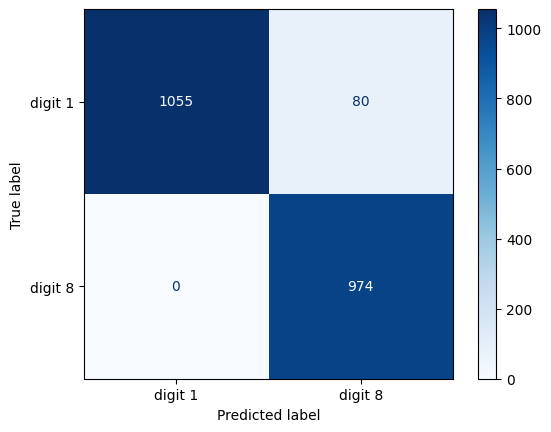

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 혼동 행렬 계산
cm = confusion_matrix(y_test_mix, y_pred)

# 출력
print("Confusion Matrix:\n", cm)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["digit 1", "digit 8"])
disp.plot(cmap="Blues")
plt.show()


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1014 - val_loss: 0.0414
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0380 - val_loss: 0.0288
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0272 - val_loss: 0.0244
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0231 - val_loss: 0.0212
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0204 - val_loss: 0.0192
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0185 - val_loss: 0.0176
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0172 - val_loss: 0.0165
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0161 - val_loss: 0.0156
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0151 - val_loss: 0.0149
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0144 - val_loss: 0.0143
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

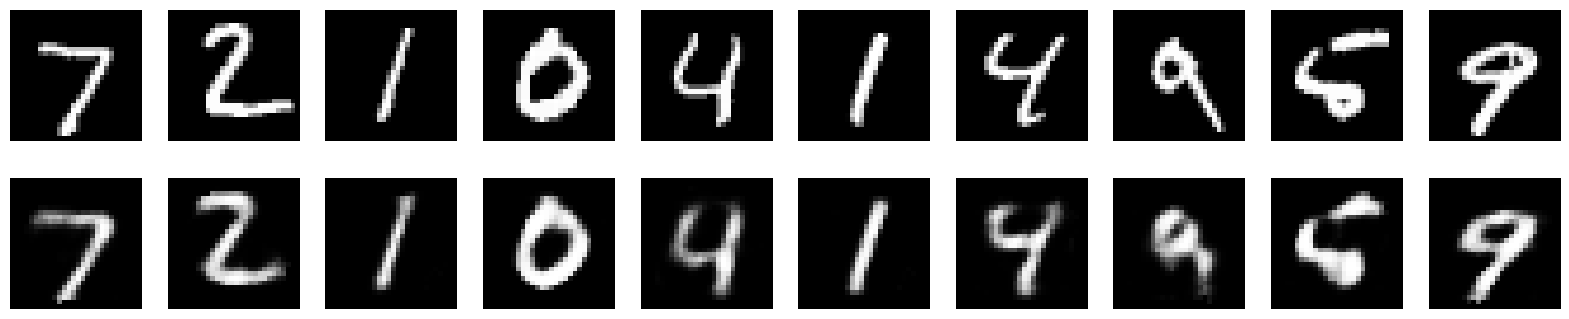

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.utils import to_categorical

# 1. 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 정규화
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# reshape
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# One-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 2. Autoencoder 정의
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
encoded = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(encoded)
latent = Dense(32, activation='relu')(encoded)   # 잠재공간

decoded = Dense(64, activation='relu')(latent)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(28*28, activation='sigmoid')(decoded)
decoded = Reshape((28, 28, 1))(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 3. Autoencoder 학습
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)

# 4. Encoder 모델 추출
encoder = Model(input_img, latent)

# 5. 분류기 정의 (Encoder + Softmax)
encoded_input = Input(shape=(32,))
classifier_output = Dense(10, activation="softmax")(encoded_input)
classifier = Model(encoded_input, classifier_output)

classifier.compile(optimizer="adam",
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

# 6. Encoder를 통해 feature 추출
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

# 7. Classifier 학습
classifier.fit(x_train_encoded, y_train_cat,
               epochs=20,
               batch_size=256,
               validation_split=0.2)

# 8. 평가
loss, acc = classifier.evaluate(x_test_encoded, y_test_cat)
print("Test Accuracy:", acc)

# 9. 예시: 원본 / 재구성 비교
decoded_imgs = autoencoder.predict(x_test[:10])

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # 재구성
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1020 - val_loss: 0.0426
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0386 - val_loss: 0.0299
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0282 - val_loss: 0.0246
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0237 - val_loss: 0.0220
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0214 - val_loss: 0.0202
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0198 - val_loss: 0.0190
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0185 - val_loss: 0.0177
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0172 - val_loss: 0.0167
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0164 - val_loss: 0.0161
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0157 - val_loss: 0.0151
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
클러스터 개수 (Noise 제외): 0
각 데이터 클러스터 라벨 분포: (array([-1]), array([10000]))


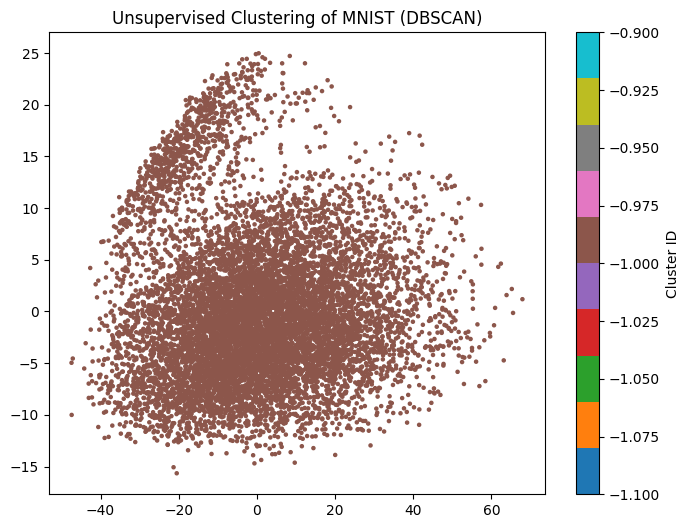

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# 1. 데이터 불러오기
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# 2. Autoencoder 정의
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
encoded = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(encoded)
latent = Dense(32, activation='relu')(encoded)   # 잠재공간 (32차원)

decoded = Dense(64, activation='relu')(latent)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(28*28, activation='sigmoid')(decoded)
decoded = Reshape((28, 28, 1))(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 3. Autoencoder 학습
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)

# 4. Encoder 추출
encoder = Model(input_img, latent)

# 5. Feature 추출
features = encoder.predict(x_test)

# 6. DBSCAN으로 클러스터링 (자동으로 클러스터 개수 결정)
clustering = DBSCAN(eps=3, min_samples=10).fit(features)
labels = clustering.labels_

print("클러스터 개수 (Noise 제외):", len(set(labels)) - (1 if -1 in labels else 0))
print("각 데이터 클러스터 라벨 분포:", np.unique(labels, return_counts=True))

# 7. 2차원 시각화 (PCA)
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(features_2d[:,0], features_2d[:,1], c=labels, cmap='tab10', s=5)
plt.colorbar(scatter, label="Cluster ID")
plt.title("Unsupervised Clustering of MNIST (DBSCAN)")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
k=2, silhouette score=0.2695
k=3, silhouette score=0.1747
k=4, silhouette score=0.1268
k=5, silhouette score=0.1214
k=6, silhouette score=0.1307
k=7, silhouette score=0.1321
k=8, silhouette score=0.1350
k=9, silhouette score=0.1371
k=10, silhouette score=0.1278
k=11, silhouette score=0.1269
k=12, silhouette score=0.1275
k=13, silhouette score=0.1225
k=14, silhouette score=0.1268
Best k (by silhouette): 2


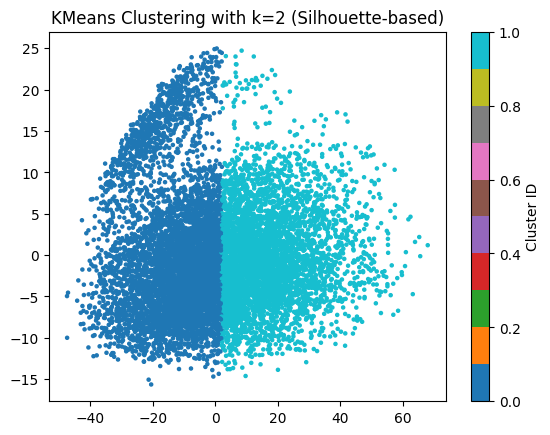

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Autoencoder로 feature 추출 (앞 단계 encoder.predict(features) 재사용)
features = encoder.predict(x_test)

# 2. 여러 k값에 대해 silhouette score 계산
sil_scores = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    score = silhouette_score(features, kmeans.labels_)
    sil_scores[k] = score
    print(f"k={k}, silhouette score={score:.4f}")

# 3. 가장 높은 score를 주는 k 선택
best_k = max(sil_scores, key=sil_scores.get)
print("Best k (by silhouette):", best_k)

# 4. 최적 k로 최종 클러스터링
kmeans = KMeans(n_clusters=best_k, random_state=42).fit(features)
labels = kmeans.labels_

# 5. 2차원 시각화
features_2d = PCA(n_components=2).fit_transform(features)
plt.scatter(features_2d[:,0], features_2d[:,1], c=labels, cmap="tab10", s=5)
plt.colorbar(label="Cluster ID")
plt.title(f"KMeans Clustering with k={best_k} (Silhouette-based)")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
k=2, silhouette score=0.2695
k=3, silhouette score=0.1747
k=4, silhouette score=0.1268
k=5, silhouette score=0.1214
k=6, silhouette score=0.1307
k=7, silhouette score=0.1321
k=8, silhouette score=0.1350
k=9, silhouette score=0.1371
k=10, silhouette score=0.1278
k=11, silhouette score=0.1269
k=12, silhouette score=0.1275
k=13, silhouette score=0.1225
k=14, silhouette score=0.1268
Best k (by silhouette): 2


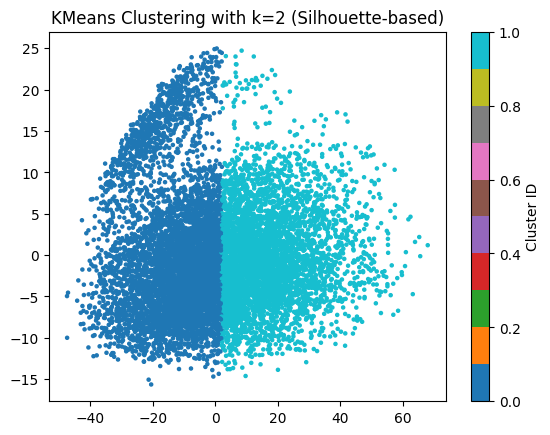

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Autoencoder로 feature 추출 (앞 단계 encoder.predict(features) 재사용)
features = encoder.predict(x_test)

# 2. 여러 k값에 대해 silhouette score 계산
sil_scores = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    score = silhouette_score(features, kmeans.labels_)
    sil_scores[k] = score
    print(f"k={k}, silhouette score={score:.4f}")

# 3. 가장 높은 score를 주는 k 선택
best_k = max(sil_scores, key=sil_scores.get)
print("Best k (by silhouette):", best_k)

# 4. 최적 k로 최종 클러스터링
kmeans = KMeans(n_clusters=best_k, random_state=42).fit(features)
labels = kmeans.labels_

# 5. 2차원 시각화
features_2d = PCA(n_components=2).fit_transform(features)
plt.scatter(features_2d[:,0], features_2d[:,1], c=labels, cmap="tab10", s=5)
plt.colorbar(label="Cluster ID")
plt.title(f"KMeans Clustering with k={best_k} (Silhouette-based)")
plt.show()


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# -----------------------------
# 1. Titanic 데이터 로드 및 전처리
# -----------------------------
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# 간단한 전처리: 필요없는 칼럼 제거
titanic = titanic.drop(["Name", "Ticket", "Cabin"], axis=1)

# 범주형 -> 숫자 변환
for col in ["Sex", "Embarked"]:
    titanic[col] = LabelEncoder().fit_transform(titanic[col].astype(str))

# 결측값 처리
titanic = titanic.fillna(titanic.median())

X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 2. 지도학습 - Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)

# -----------------------------
# 3. Autoencoder (비지도)
#    -> 생존자 데이터만 사용해서 학습
# -----------------------------
X_train_survivors = X_train_scaled[y_train==1]

input_dim = X_train_survivors.shape[1]
encoding_dim = 6  # latent dimension

input_layer = Input(shape=(input_dim,))
encoded = Dense(12, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(12, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(0.001), loss='mse')

# Autoencoder 학습 (생존자만)
autoencoder.fit(X_train_survivors, X_train_survivors,
                epochs=50,
                batch_size=16,
                shuffle=True,
                verbose=0)

# -----------------------------
# 4. 검증 데이터 이상치 탐지
# -----------------------------
# reconstruction error
reconstructions = autoencoder.predict(X_test_scaled)
mse = np.mean(np.square(X_test_scaled - reconstructions), axis=1)

# threshold 설정 (생존자 학습셋의 reconstruction error 기반)
reconstructions_train = autoencoder.predict(X_train_survivors)
mse_train = np.mean(np.square(X_train_survivors - reconstructions_train), axis=1)
threshold = np.percentile(mse_train, 95)  # 상위 5%를 이상치로

# 예측: mse > threshold -> 이상치(사망자=0), 정상(생존자=1)
y_pred_autoenc = (mse <= threshold).astype(int)

cm_autoenc = confusion_matrix(y_test, y_pred_autoenc)
print("Autoencoder (Anomaly Detection) Confusion Matrix:\n", cm_autoenc)


Random Forest Confusion Matrix:
 [[148  17]
 [ 32  71]]
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Autoencoder (Anomaly Detection) Confusion Matrix:
 [[ 22 143]
 [  6  97]]


Random Forest Confusion Matrix:
[[148  17]
 [ 32  71]]
Random Forest Accuracy: 0.817

Training Autoencoder...


Analyzing different thresholds...


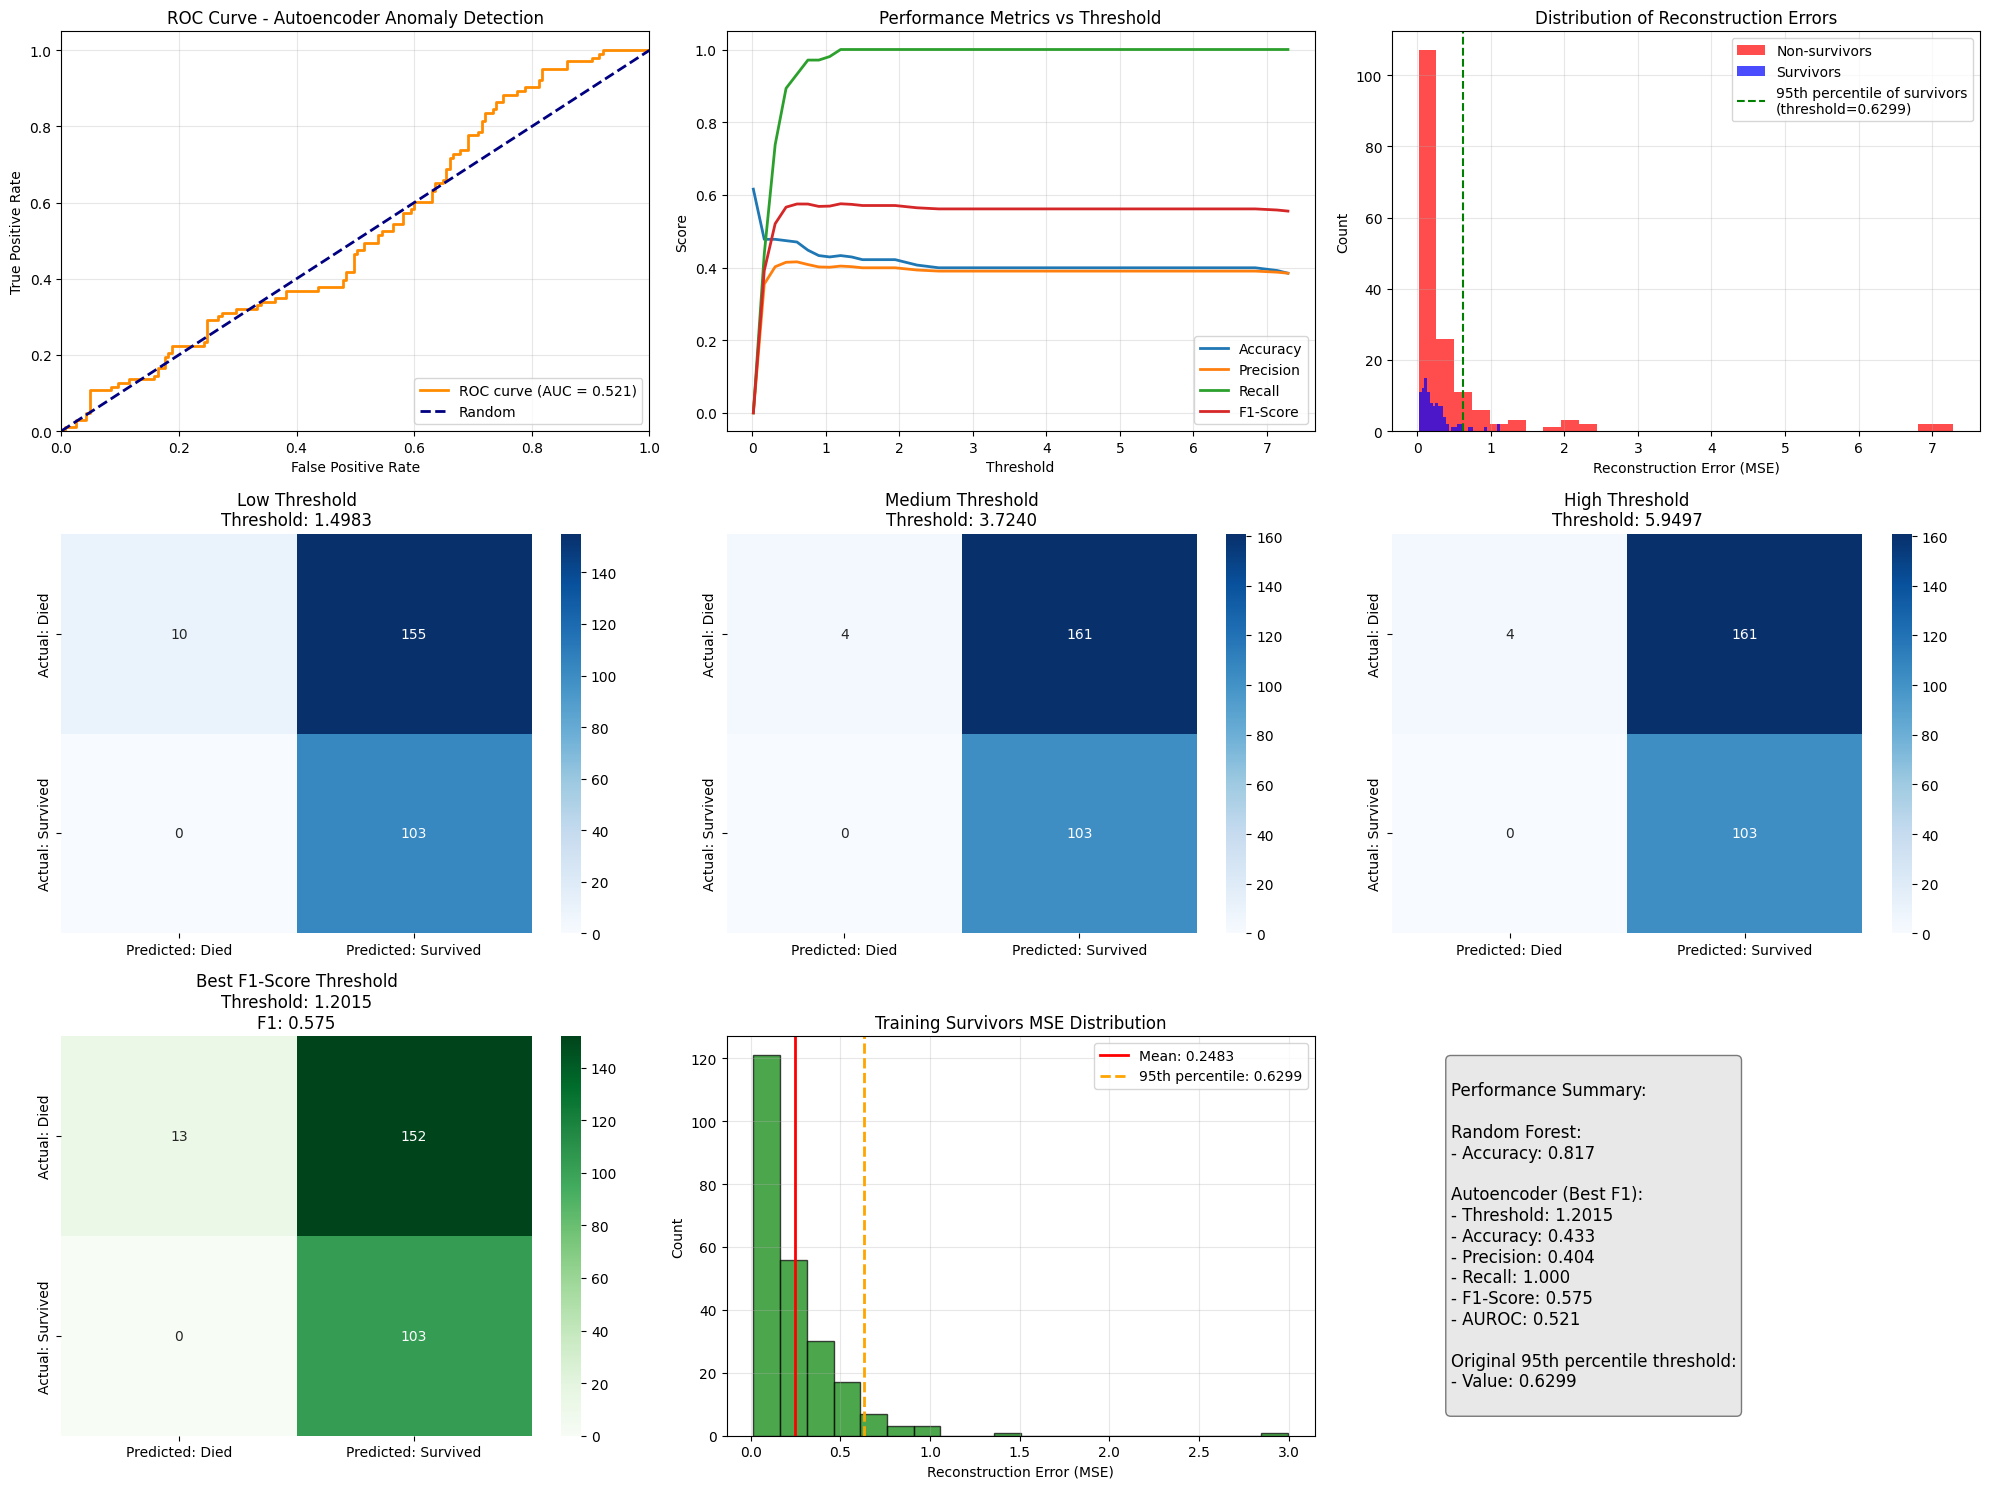


DETAILED RESULTS

ROC AUC Score: 0.5212
Best F1-Score: 0.5754 at threshold: 1.2015
Original 95th percentile threshold: 0.6299

Best Threshold Confusion Matrix:
[[ 13 152]
 [  0 103]]

Classification Report for Best Threshold:
              precision    recall  f1-score   support

        Died       1.00      0.08      0.15       165
    Survived       0.40      1.00      0.58       103

    accuracy                           0.43       268
   macro avg       0.70      0.54      0.36       268
weighted avg       0.77      0.43      0.31       268



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Use default matplotlib font settings

# -----------------------------
# 1. Titanic 데이터 로드 및 전처리
# -----------------------------
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# 간단한 전처리: 필요없는 칼럼 제거
titanic = titanic.drop(["Name", "Ticket", "Cabin"], axis=1)

# 범주형 -> 숫자 변환
for col in ["Sex", "Embarked"]:
    titanic[col] = LabelEncoder().fit_transform(titanic[col].astype(str))

# 결측값 처리
titanic = titanic.fillna(titanic.median())

X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 2. 지도학습 - Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)
print(f"Random Forest Accuracy: {(cm_rf[0,0] + cm_rf[1,1]) / cm_rf.sum():.3f}\n")

# -----------------------------
# 3. Autoencoder (비지도)
#    -> 생존자 데이터만 사용해서 학습
# -----------------------------
X_train_survivors = X_train_scaled[y_train==1]

input_dim = X_train_survivors.shape[1]
encoding_dim = 6  # latent dimension

input_layer = Input(shape=(input_dim,))
encoded = Dense(12, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(12, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(0.001), loss='mse')

# Autoencoder 학습 (생존자만)
print("Training Autoencoder...")
autoencoder.fit(X_train_survivors, X_train_survivors,
                epochs=50,
                batch_size=16,
                shuffle=True,
                verbose=0)

# -----------------------------
# 4. Reconstruction Error 계산
# -----------------------------
# 테스트 데이터의 reconstruction error
reconstructions_test = autoencoder.predict(X_test_scaled, verbose=0)
mse_test = np.mean(np.square(X_test_scaled - reconstructions_test), axis=1)

# 생존자 학습 데이터의 reconstruction error (기준점)
reconstructions_train = autoencoder.predict(X_train_survivors, verbose=0)
mse_train = np.mean(np.square(X_train_survivors - reconstructions_train), axis=1)

# -----------------------------
# 5. 다양한 Threshold에 대한 성능 분석
# -----------------------------
# threshold 범위 설정
min_mse = min(mse_test.min(), mse_train.min())
max_mse = max(mse_test.max(), mse_train.max())
thresholds = np.linspace(min_mse, max_mse, 50)

# 성능 지표 저장용
accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

print("Analyzing different thresholds...")
for threshold in thresholds:
    # 예측: mse <= threshold -> 생존자(1), mse > threshold -> 사망자(0)
    y_pred = (mse_test <= threshold).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # 성능 지표 계산
    if cm.sum() > 0:
        accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
        precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0
        recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    else:
        accuracy = precision = recall = f1 = 0

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# -----------------------------
# 6. ROC 곡선 및 AUROC 계산
# -----------------------------
# reconstruction error가 높을수록 사망자일 확률이 높다고 가정
# 따라서 -mse_test를 score로 사용 (낮은 error = 높은 생존 확률)
fpr, tpr, roc_thresholds = roc_curve(y_test, -mse_test)
roc_auc = auc(fpr, tpr)

# -----------------------------
# 7. 시각화
# -----------------------------
fig = plt.figure(figsize=(20, 15))

# 1) ROC 곡선
plt.subplot(3, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Autoencoder Anomaly Detection')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# 2) Threshold에 따른 성능 지표
plt.subplot(3, 3, 2)
plt.plot(thresholds, accuracies, label='Accuracy', linewidth=2)
plt.plot(thresholds, precisions, label='Precision', linewidth=2)
plt.plot(thresholds, recalls, label='Recall', linewidth=2)
plt.plot(thresholds, f1_scores, label='F1-Score', linewidth=2)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

# 3) MSE 분포
plt.subplot(3, 3, 3)
plt.hist(mse_test[y_test==0], bins=30, alpha=0.7, label='Non-survivors', color='red')
plt.hist(mse_test[y_test==1], bins=30, alpha=0.7, label='Survivors', color='blue')
plt.axvline(np.percentile(mse_train, 95), color='green', linestyle='--',
           label=f'95th percentile of survivors\n(threshold={np.percentile(mse_train, 95):.4f})')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Count')
plt.title('Distribution of Reconstruction Errors')
plt.legend()
plt.grid(True, alpha=0.3)

# 4-6) 대표적인 threshold에서의 Confusion Matrix
representative_indices = [10, 25, 40]  # 초기, 중간, 후기 threshold
representative_labels = ['Low Threshold', 'Medium Threshold', 'High Threshold']

for i, (idx, label) in enumerate(zip(representative_indices, representative_labels)):
    plt.subplot(3, 3, 4+i)
    cm = confusion_matrices[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted: Died', 'Predicted: Survived'],
                yticklabels=['Actual: Died', 'Actual: Survived'])
    plt.title(f'{label}\nThreshold: {thresholds[idx]:.4f}')

# 7) 최적 threshold 찾기 (F1-score 기준)
best_f1_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_idx]
best_cm = confusion_matrices[best_f1_idx]

plt.subplot(3, 3, 7)
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted: Died', 'Predicted: Survived'],
            yticklabels=['Actual: Died', 'Actual: Survived'])
plt.title(f'Best F1-Score Threshold\nThreshold: {best_threshold:.4f}\nF1: {f1_scores[best_f1_idx]:.3f}')

# 8) Training survivors MSE 분포
plt.subplot(3, 3, 8)
plt.hist(mse_train, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.axvline(np.mean(mse_train), color='red', linestyle='-', linewidth=2, label=f'Mean: {np.mean(mse_train):.4f}')
plt.axvline(np.percentile(mse_train, 95), color='orange', linestyle='--', linewidth=2,
           label=f'95th percentile: {np.percentile(mse_train, 95):.4f}')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Count')
plt.title('Training Survivors MSE Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# 9) 성능 요약
plt.subplot(3, 3, 9)
plt.axis('off')
summary_text = f"""
Performance Summary:

Random Forest:
- Accuracy: {(cm_rf[0,0] + cm_rf[1,1]) / cm_rf.sum():.3f}

Autoencoder (Best F1):
- Threshold: {best_threshold:.4f}
- Accuracy: {accuracies[best_f1_idx]:.3f}
- Precision: {precisions[best_f1_idx]:.3f}
- Recall: {recalls[best_f1_idx]:.3f}
- F1-Score: {f1_scores[best_f1_idx]:.3f}
- AUROC: {roc_auc:.3f}

Original 95th percentile threshold:
- Value: {np.percentile(mse_train, 95):.4f}
"""

plt.text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.5))

plt.tight_layout()
plt.show()

# 상세 결과 출력
print("\n" + "="*60)
print("DETAILED RESULTS")
print("="*60)

print(f"\nROC AUC Score: {roc_auc:.4f}")
print(f"Best F1-Score: {max(f1_scores):.4f} at threshold: {best_threshold:.4f}")
print(f"Original 95th percentile threshold: {np.percentile(mse_train, 95):.4f}")

print(f"\nBest Threshold Confusion Matrix:")
print(best_cm)

print(f"\nClassification Report for Best Threshold:")
y_pred_best = (mse_test <= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best, target_names=['Died', 'Survived']))